# Cargue de Datos para el Modelo K-Nearest Neighbors - KNN

### KNN - (K-Nearest Neighbors)

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

ruta = r'C:/Users/wmanj/OneDrive/Escritorio/MACHINELEARNING/tornados.csv'  
df = pd.read_csv(ruta)  
df.isnull().sum()

om                  0
yr                  0
mo                  0
dy                  0
date                0
time                0
tz                  0
datetime_utc        0
st                  0
stf                 0
mag               756
inj                 0
fat                 0
loss            27170
slat                0
slon                0
elat                0
elon                0
len                 0
wid                 0
ns                  0
sn                  0
f1                  0
f2                  0
f3                  0
f4                  0
fc                  0
dtype: int64

In [4]:
df['loss'] = df['loss'].replace(0, pd.NA)
df['loss'] = df['loss'].interpolate(method='linear')
# Imputar los valores NaN con la media de la columna 'mag'
df['mag'] = df['mag'].fillna(df['mag'].mean())

In [5]:
df.isnull().sum()

om              0
yr              0
mo              0
dy              0
date            0
time            0
tz              0
datetime_utc    0
st              0
stf             0
mag             0
inj             0
fat             0
loss            0
slat            0
slon            0
elat            0
elon            0
len             0
wid             0
ns              0
sn              0
f1              0
f2              0
f3              0
f4              0
fc              0
dtype: int64

In [ ]:
pip install mglearn

In [7]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
# Crear la columna 'mortality' en el DataFrame original
df['mortality'] = df['fat'].apply(lambda x: 0 if x == 0 else 1)

# Renombrar el DataFrame a 'mortality_target'
mortality_target = df

In [ ]:
import numpy as np

# Crear la columna 'mortality' con 0 si 'fat' es 0, y 1 si 'fat' es mayor que 0
df['mortality'] = np.where(df['fat'] == 0, 0, 1)

# Contar la cantidad de ceros y unos
print("Cantidad de ceros:", (df['mortality'] == 0).sum())
print("Cantidad de unos:", (df['mortality'] == 1).sum())

# Asignar el DataFrame modificado a 'tornados.target'
tornados_target = df

Cantidad de ceros: 67120
Cantidad de unos: 1573


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = tornados_target[['om', 'yr', 'mo', 'dy', 'stf', 'mag', 'inj', 'fat', 'loss', 'slat', 'slon', 'elat', 'elon', 'len', 'wid', 'ns', 'sn', 'f1', 'f2', 'f3', 'f4']]
y = df['mortality']

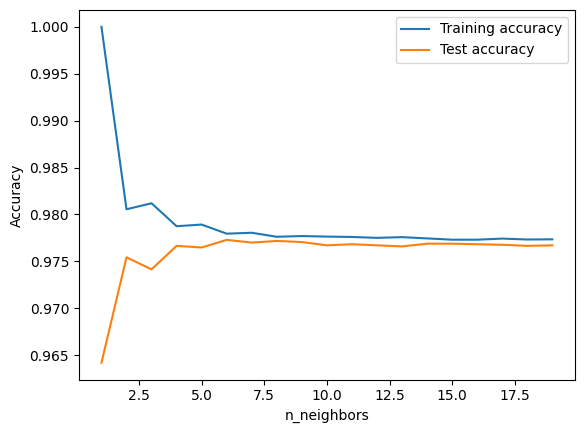

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Seleccionar las características y la variable objetivo
X = tornados_target[['mag', 'slat', 'slon', 'elat', 'elon', 'len', 'wid','fat','f1', 'f2', 'f3', 'f4']]
y = df['mortality']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)

# Listas para almacenar la exactitud en entrenamiento y prueba
training_accuracy = []
test_accuracy = []

# Configuración de los vecinos
neighbors_settings = range(1, 20)

# Bucle para ajustar el modelo con diferentes números de vecinos
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Graficar los resultados
plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

Si la precisión en prueba es alta y se acerca a la precisión en entrenamiento, es una buena señal de que el modelo es bien ajustado (no está ni sobreajustado ni subajustado).

Si la precisión en prueba es baja, eso indica que el modelo no generaliza bien y necesita ajustes (puede que sea necesario modificar la cantidad de vecinos).

In [13]:
clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [14]:
print(clf.score(X_train, y_train), clf.score(X_test, y_test))

0.9775034453308488 0.9767089786887155


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import numpy as np

In [16]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)

In [17]:
best_score = 0
for n_neighbors in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)        
    scores = cross_val_score(knn, X_train, y_train, cv=5) 
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = {'n_neighbors': n_neighbors}
print("Best cross-validation accuracy: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)

Best cross-validation accuracy: 0.98
Best parameters:  {'n_neighbors': 19}


In [18]:
knn = KNeighborsClassifier(**best_parameters)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [19]:
print("Train set accuracy:", knn.score(X_train, y_train), "; Test set accuracy:", knn.score(X_test, y_test))

Train set accuracy: 0.9773481628137192 ; Test set accuracy: 0.9767089786887155


In [ ]:
pip install mglearn

In [ ]:
import mglearn

In [ ]:
pip install neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error
import numpy as np

rmsle_val = []
best_rmsle = 1.0

for k in range(100):
    k = k + 1
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    
    if rmsle < best_rmsle:
        best_rmsle = rmsle
        best_k = k
    
    rmsle_val.append(rmsle)
    print('RMSLE value for k= ', k, 'is:', rmsle)

print(f"Best RMSLE: {best_rmsle}, Best k: {best_k}")

RMSLE value for k=  1 is: 0.13116781667521776
RMSLE value for k=  2 is: 0.1173680111273083
RMSLE value for k=  3 is: 0.1128072041698597
RMSLE value for k=  4 is: 0.11033405734869016
RMSLE value for k=  5 is: 0.10817870401413761
RMSLE value for k=  6 is: 0.1061301129022195
RMSLE value for k=  7 is: 0.10529381628716074
RMSLE value for k=  8 is: 0.10484730616326025
RMSLE value for k=  9 is: 0.10435083343092043
RMSLE value for k=  10 is: 0.1041645760126683
RMSLE value for k=  11 is: 0.1036397873763109
RMSLE value for k=  12 is: 0.10327599368206312
RMSLE value for k=  13 is: 0.10321771708418433
RMSLE value for k=  14 is: 0.10288447451144551
RMSLE value for k=  15 is: 0.10272400699808597
RMSLE value for k=  16 is: 0.10238675447374329
RMSLE value for k=  17 is: 0.10213533855409873
RMSLE value for k=  18 is: 0.1019942381694187
RMSLE value for k=  19 is: 0.10169581192814242
RMSLE value for k=  20 is: 0.10154800681617192
RMSLE value for k=  21 is: 0.10135038037545936
RMSLE value for k=  22 is: 0

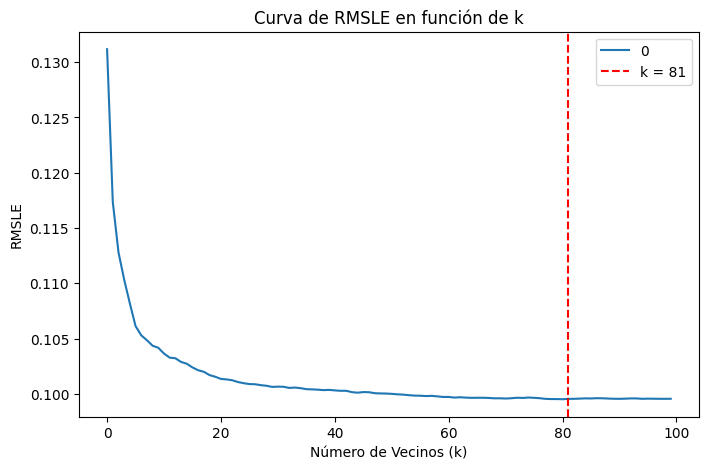

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

curve = pd.DataFrame(rmsle_val)
curve.plot(figsize=(8,5))

# Etiquetas para los ejes
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('RMSLE')

# Título opcional para mejorar la comprensión
plt.title('Curva de RMSLE en función de k')

# Resaltar k=81
plt.axvline(x=81, color='r', linestyle='--', label='k = 81')

# Añadir una leyenda para identificar la línea
plt.legend()

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor  # Importa desde sklearn.neighbors

# Ahora puedes crear el modelo sin el error
knn = KNeighborsRegressor(n_neighbors=81)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = knn.score(X_test, y_test)

print(f"Score del modelo: {score}")

Score del modelo: 0.08274669092769293


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo con los datos escalados
knn = KNeighborsRegressor(n_neighbors=31)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
score = knn.score(X_test_scaled, y_test)

print(f"Score del modelo después de escalar: {score}")

Score del modelo después de escalar: 0.5293018384402577


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, explained_variance_score, mean_squared_error, mean_squared_log_error

# Cálculos de las métricas
r2_valid = r2_score(y_test, y_pred)
mae_valid = mean_absolute_error(y_test, y_pred)
evs_valid = explained_variance_score(y_test, y_pred, multioutput='uniform_average')
rmse_valid = np.sqrt(mean_squared_error(y_test, y_pred))
rmsle_valid = np.sqrt(mean_squared_log_error(y_test, y_pred))

# Mostrar los resultados
print('R2 Valid:', r2_valid)
print('EVS Valid:', evs_valid)
print('MAE Valid:', mae_valid)
print('RMSE Valid:', rmse_valid)
print('RMSLE Valid:', rmsle_valid)

R2 Valid: 0.5293018384402577
EVS Valid: 0.532243762788029
MAE Valid: 0.016998688940897153
RMSE Valid: 0.10258998973228019
RMSLE Valid: 0.06850015437688937


In [ ]:
# Usaremos la columna 'st' del DataFrame original para identificar cada muestra en el test.
countries_test = df.loc[X_test.index, 'st']

# Organizar los valores reales y las predicciones en un DataFrame
data_prediction = list(zip(y_test, y_pred))
data_prediction = pd.DataFrame(data_prediction, columns=['Test', 'Prediction'])

# Establecer como índice los identificadores de cada muestra (en este caso, el valor de 'st')
data_prediction = data_prediction.set_index(countries_test)

data_prediction = list(zip(y_test,y_pred))
data_prediction = pd.DataFrame(data_prediction, columns=['Test','Prediction'])
data_prediction = data_prediction.set_index(countries_test)
data_prediction.head(20)

,Test,Prediction
st,,
KS,0,0.000000
OK,0,0.161290
KY,0,0.000000
ND,0,0.000000
NE,0,0.000000
IL,0,0.000000
SC,0,0.000000
MS,0,0.000000
KY,0,0.000000


In [29]:
import plotly.graph_objects as go
import numpy as np

# Preparar datos
data_3d = data_prediction.copy()
data_3d['st'] = data_3d.index.astype(str)
data_3d['Error'] = np.abs(data_3d['Test'] - data_3d['Prediction'])

# Crear el gráfico 3D
fig = go.Figure(data=[go.Scatter3d(
    x=data_3d['st'],                # Muestras
    y=data_3d['Test'],              # Valor real
    z=data_3d['Prediction'],        # Valor predicho
    mode='markers',
    marker=dict(
        size=8,
        color=data_3d['Error'],     # Color por error
        colorscale='Viridis',
        colorbar=dict(title='Error absoluto'),
        opacity=0.8
    ),
    text=[f"ST: {st}<br>Real: {real:.2f}<br>Pred: {pred:.2f}<br>Error: {err:.2f}" 
          for st, real, pred, err in zip(data_3d['st'], data_3d['Test'], data_3d['Prediction'], data_3d['Error'])],
    hoverinfo='text'
)])

# Ajustes de la escena
fig.update_layout(
    title='Comparación 3D con Error absoluto por color',
    scene=dict(
        xaxis_title='STATE',
        yaxis_title='Test',
        zaxis_title='Predicción'
    ),
    height=600
)

fig.show()

# Regresión Lineal

In [30]:
ruta = r'C:/Users/wmanj/OneDrive/Escritorio/MACHINELEARNING/tornados.csv'  
df = pd.read_csv(ruta)  
df.isnull().sum()


om                  0
yr                  0
mo                  0
dy                  0
date                0
time                0
tz                  0
datetime_utc        0
st                  0
stf                 0
mag               756
inj                 0
fat                 0
loss            27170
slat                0
slon                0
elat                0
elon                0
len                 0
wid                 0
ns                  0
sn                  0
f1                  0
f2                  0
f3                  0
f4                  0
fc                  0
dtype: int64

In [31]:
df['loss'] = df['loss'].replace(0, pd.NA)
df['loss'] = df['loss'].interpolate(method='linear')
# Imputar los valores NaN con la media de la columna 'mag'
df['mag'] = df['mag'].fillna(df['mag'].mean())

In [32]:
df.isnull().sum()

om              0
yr              0
mo              0
dy              0
date            0
time            0
tz              0
datetime_utc    0
st              0
stf             0
mag             0
inj             0
fat             0
loss            0
slat            0
slon            0
elat            0
elon            0
len             0
wid             0
ns              0
sn              0
f1              0
f2              0
f3              0
f4              0
fc              0
dtype: int64

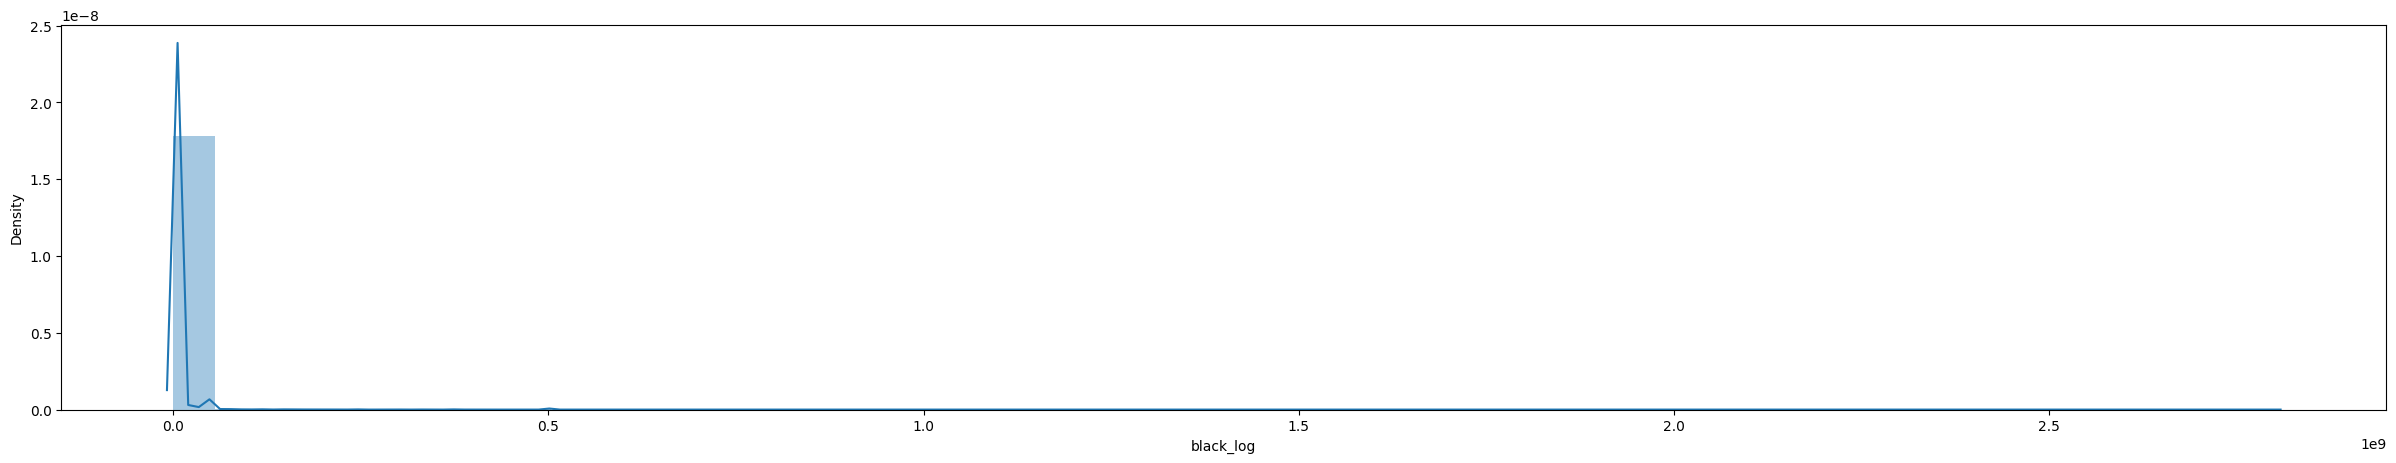

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura
plt.figure(figsize=(30,5))

# Crear el gráfico de distribución
sns.distplot(df["loss"], axlabel="black_log")

# Mostrar el gráfico
plt.show()

In [34]:
# Contar el número de datos no nulos por columna en X
print("Número de datos por columna en X:")
print(X.count())


Número de datos por columna en X:
mag     68693
slat    68693
slon    68693
elat    68693
elon    68693
len     68693
wid     68693
fat     68693
f1      68693
f2      68693
f3      68693
f4      68693
dtype: int64


In [ ]:
# Contar el número de datos no nulos en y
print("\nNúmero de datos en y:")
print(y.count())


Número de datos en y:
68693


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Definir X y y (asegúrate de que ya tienes estas variables previamente definidas)
X = df[['mag', 'slat', 'slon', 'elat', 'elon', 'len', 'wid','fat','f1', 'f2', 'f3', 'f4','loss']]
y = df['inj']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
lr = LinearRegression().fit(X_train, y_train)

# Mostrar los coeficientes y el intercepto del modelo
print("Coeficientes del modelo:", lr.coef_)
print("Intercepto del modelo:", lr.intercept_)

# Hacer predicciones con el modelo en el conjunto de prueba
y_pred = lr.predict(X_test)

# Evaluar el modelo con la puntuación R^2 (coeficiente de determinación)
r2_score = lr.score(X_test, y_test)
print(f"Puntuación R^2 en el conjunto de prueba: {r2_score}")

Coeficientes del modelo: [ 1.03933097e+00 -2.34167006e-02  5.48057092e-03  1.67695299e-02
  1.01654786e-02  1.32225799e-01  8.84202034e-04  7.64548959e+00
 -6.75772303e-04  9.71291867e-04  1.96154227e-03  9.77616370e-03
  1.14162944e-07]
Intercepto del modelo: 0.8017899647209744
Puntuación R^2 en el conjunto de prueba: 0.6574705265235996


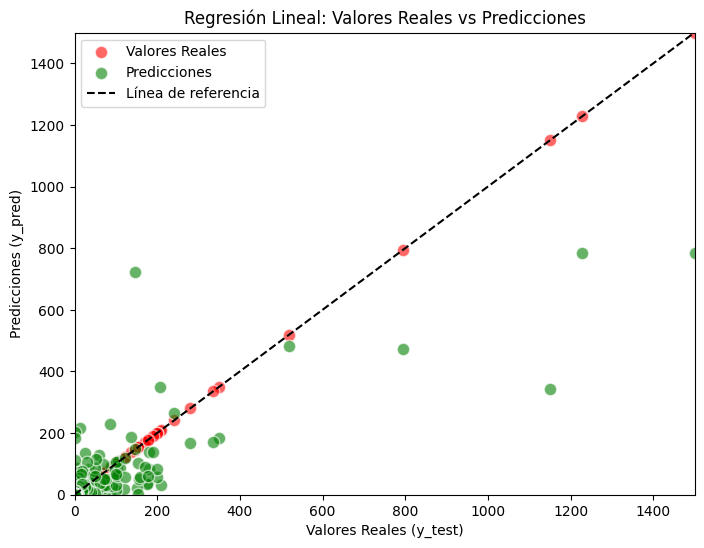

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ajustar el gráfico de dispersión
plt.figure(figsize=(8, 6))

# Graficar los puntos de los valores reales (y_test) en rojo
plt.scatter(y_test, y_test, color='red', alpha=0.6, label="Valores Reales", edgecolors='w', s=80)

# Graficar los puntos de las predicciones (y_pred) en verde
plt.scatter(y_test, y_pred, color='green', alpha=0.6, label="Predicciones", edgecolors='w', s=80)

# Agregar una línea de referencia y = x
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Línea de referencia")

# Ajustar límites de los ejes para que coincidan mejor
plt.xlim([min(y_test) - 0.1, max(y_test) + 0.1])
plt.ylim([min(y_test) - 0.1, max(y_test) + 0.1])

# Etiquetas y título
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.title('Regresión Lineal: Valores Reales vs Predicciones')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

# Regresión Ridge

In [38]:
from sklearn.linear_model import Ridge

In [39]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
# Ver los coeficientes de cada variable en el modelo
coeficientes = pd.Series(ridge.coef_, index=X_train.columns)

# Ver el intercepto del modelo
intercepto = ridge.intercept_

# Mostrar los coeficientes y el intercepto
print("Coeficientes del modelo ridge:")
print(coeficientes)

print("\nIntercepto del modelo ridge:")
print(intercepto)

Training set score: 0.59
Test set score: 0.66
Coeficientes del modelo ridge:
mag     1.039309e+00
slat   -2.341668e-02
slon    5.480847e-03
elat    1.676932e-02
elon    1.016552e-02
len     1.322287e-01
wid     8.842742e-04
fat     7.645406e+00
f1     -6.757693e-04
f2      9.712519e-04
f3      1.961607e-03
f4      9.775862e-03
loss    1.141649e-07
dtype: float64

Intercepto del modelo ridge:
0.8018254182697473


In [40]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
# Ver los coeficientes de cada variable en el modelo
coeficientes = pd.Series(ridge10.coef_, index=X_train.columns)

# Ver el intercepto del modelo
intercepto = ridge10.intercept_

# Mostrar los coeficientes y el intercepto
print("Coeficientes del modelo ridge10:")
print(coeficientes)

print("\nIntercepto del modelo ridge10:")
print(intercepto)

Training set score: 0.59
Test set score: 0.66
Coeficientes del modelo ridge10:
mag     1.039110e+00
slat   -2.341653e-02
slon    5.483329e-03
elat    1.676740e-02
elon    1.016593e-02
len     1.322550e-01
wid     8.849233e-04
fat     7.644650e+00
f1     -6.757427e-04
f2      9.708920e-04
f3      1.962185e-03
f4      9.773146e-03
loss    1.141829e-07
dtype: float64

Intercepto del modelo ridge10:
0.8021444212701071


In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

# Ver los coeficientes de cada variable en el modelo
coeficientes = pd.Series(ridge01.coef_, index=X_train.columns)

# Ver el intercepto del modelo
intercepto = ridge01.intercept_

# Mostrar los coeficientes y el intercepto
print("Coeficientes del modelo ridge01:")
print(coeficientes)

print("\nIntercepto del modelo ridge01:")
print(intercepto)

Training set score: 0.59
Test set score: 0.66
Coeficientes del modelo ridge01:
mag     1.039329e+00
slat   -2.341670e-02
slon    5.480599e-03
elat    1.676951e-02
elon    1.016548e-02
len     1.322261e-01
wid     8.842092e-04
fat     7.645481e+00
f1     -6.757720e-04
f2      9.712879e-04
f3      1.961549e-03
f4      9.776134e-03
loss    1.141631e-07
dtype: float64

Intercepto del modelo ridge01:
0.8017935101684196


In [ ]:
pip install --upgrade seaborn

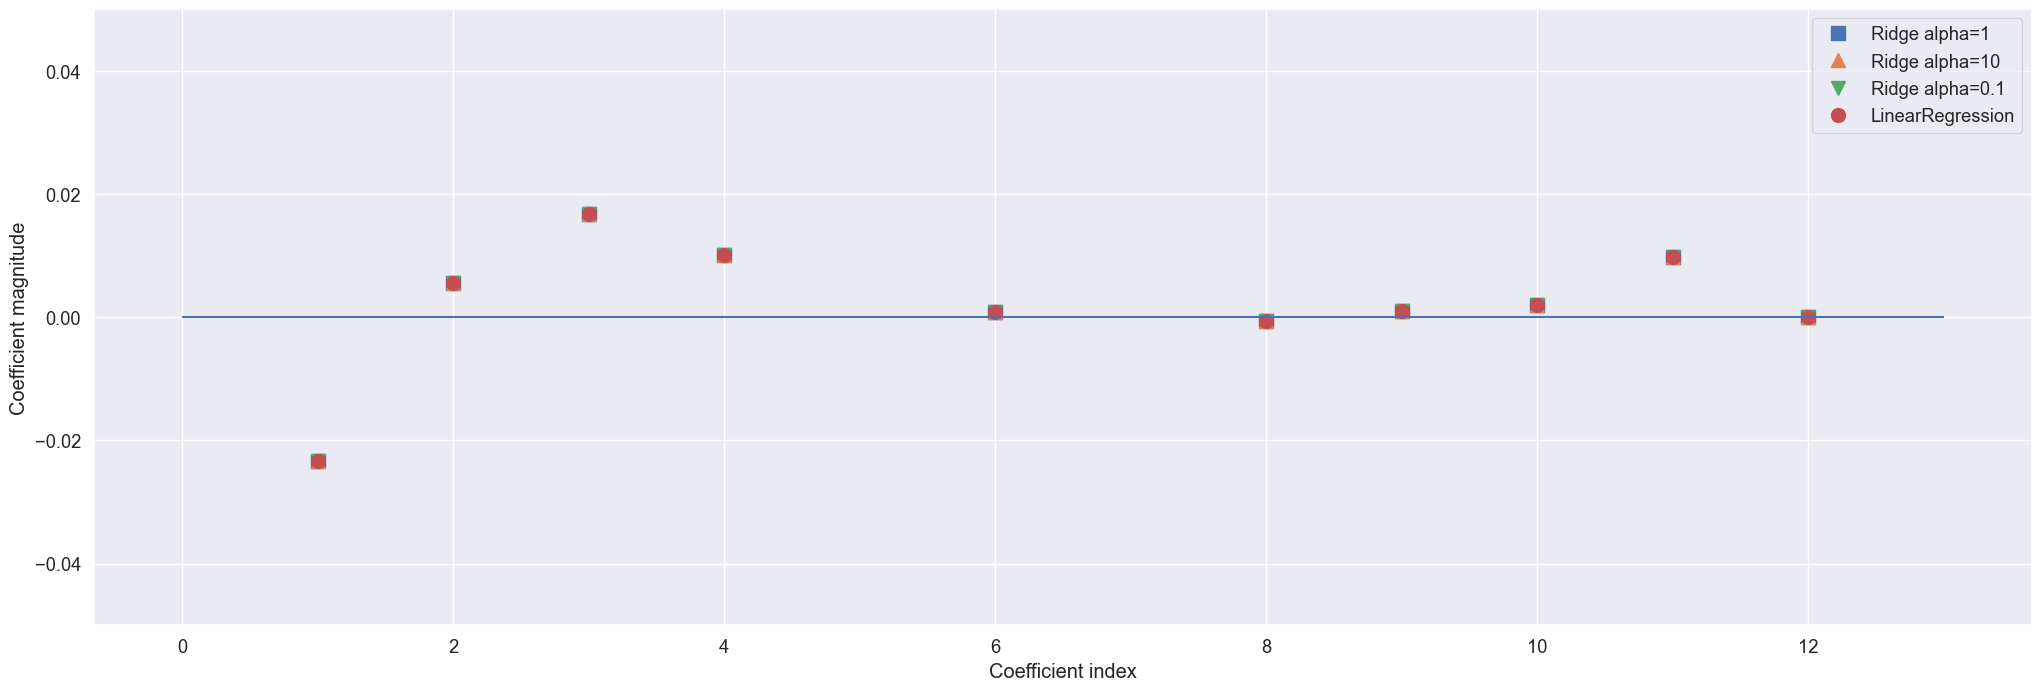

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
sns.set(font_scale=1.2)

# Establecer el tamaño de la fuente
sns.set(font_scale=1.2)

# Crear la figura
plt.figure(figsize=(25, 8))

# Graficar los coeficientes para diferentes modelos
plt.plot(ridge.coef_, 's', label="Ridge alpha=1", markersize=10)  # Tamaño de marcador aumentado
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10", markersize=10)
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1", markersize=10)
plt.plot(lr.coef_, 'o', label="LinearRegression", markersize=10)

# Ajustar las etiquetas y las líneas de referencia
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# Línea horizontal en y = 0 para visualización
plt.hlines(0, 0, len(lr.coef_))

# Ajustar el límite del eje Y
plt.ylim(-0e3, 0e3)  # Ajusta según el rango de los coeficientes (puedes modificar esto)

# Cambiar el eje Y a una escala logarítmica si la disparidad es muy grande
# plt.yscale('symlog')  # Descomenta esta línea si quieres usar una escala logarítmica

# Agregar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()